In [4]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Loading data from the datasets
boston_data = load_boston()
# Creating dataframe instance
df_boston = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

df_boston['target'] = boston_data.target

df_boston.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Find the predictors
X = df_boston.loc[:, df_boston.columns != 'target']
y = df_boston.target

rfr = RandomForestRegressor()

rfr.fit(X,y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
names = boston_data.feature_names

In [16]:
feature_scores = sorted(zip(map(lambda x: round(float(x), 4), rfr.feature_importances_), names), reverse=True)
feature_scores

[(0.5003, 'RM'),
 (0.3102, 'LSTAT'),
 (0.051, 'DIS'),
 (0.0498, 'CRIM'),
 (0.0272, 'NOX'),
 (0.0167, 'PTRATIO'),
 (0.016, 'TAX'),
 (0.0108, 'B'),
 (0.0105, 'AGE'),
 (0.0039, 'INDUS'),
 (0.0025, 'RAD'),
 (0.0006, 'ZN'),
 (0.0004, 'CHAS')]

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
sns.set_style('darkgrid')

In [24]:
x_val = list(zip(*feature_scores))[0]
y_val = list(zip(*feature_scores))[1]

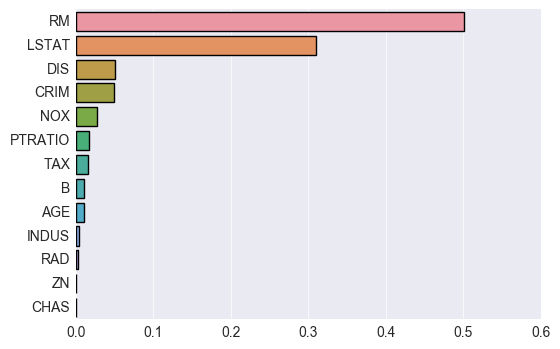

In [28]:
sns.barplot(x_val, y_val, ci=68)

In [42]:
X.columns
predictors = [x for x in X.columns if x not in ['INDUS', 'RAD', 'ZN', 'CHAS']]
X1 = X[predictors]


In [45]:
# Create a model to predict y_hat
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

dtr = DecisionTreeRegressor(max_depth=20)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)


dtr.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
r_tree = RandomForestRegressor(max_depth=20)

r_tree.fit(X_train, y_train)

pred_r_y = r_tree.predict(X_test)

In [46]:
pred_y = dtr.predict(X_test)

In [47]:
mae = mean_absolute_error(y_test, pred_y)

print("The MAE %f" %mae)

The MAE 3.105689


In [49]:
mae = mean_absolute_error(y_test, pred_r_y)

print("The MAE %f" %mae)

The MAE 2.353293


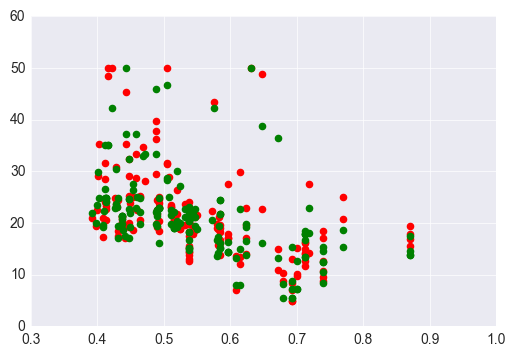

In [66]:
plt.scatter(x=X_test.values[:,1], y=y_test, color='red')
plt.scatter(x=X_test.values[:,1], y=pred_y, color='green')
# plt.scatter(x=X_test.values[:,1], y=pred_r_y)
